In [1]:
using LinearAlgebra, BlockArrays, Statistics, PyPlot
include("hw1_functions.jl")
include("hw2_functions.jl")

french_de_groot_lazy (generic function with 1 method)

### Fast dynamics
An initial condition $x(0) = x_{\text{in}}$ such that, in each one of the fully connected components, half of the nodes have opinion 1 and the other half has initial opinion 0 gives rise to a fast dynamics. The convergence time $t^*$ is indeed small and constant in $n$.

n = [50, 100, 150, 200, 250, 300, 350]
τ(n) = [10, 10, 10, 10, 10, 10, 10]


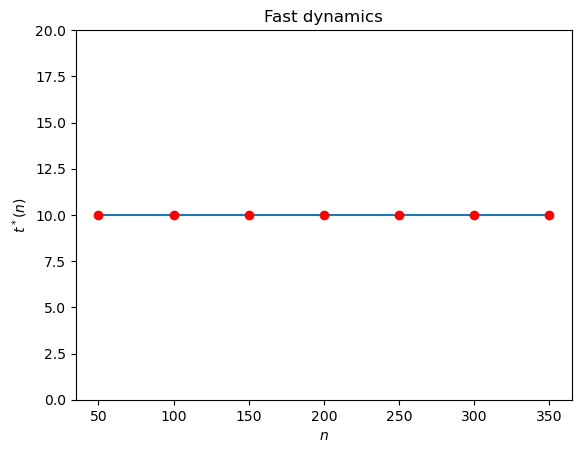

In [2]:
T = 1e3

nn_x = [50; 100; 150; 200; 250; 300; 350]
tt_x = Vector{Int}(undef,length(nn_x))

for n in nn_x
    G = barbell(n)
    x_in = [(mod(i,2)==0 ? 0 : 1) for i in 1:2*n]

    tt_x[searchsortedfirst(nn_x,n)] = french_de_groot_lazy(G.P, x_in, T, target=0.5*ones(2*n))
end

println("n = $nn_x")
println("τ(n) = $tt_x")

close("all")
plot(nn_x,tt_x)
plot(nn_x,tt_x,"or")
ylim([0,20])
xlabel(L"n")
ylabel(L"t^*(n)")
title("Fast dynamics")
gcf()

### Slow dynamics
An initial condition $x(0) = y_{\text{in}}$ such that all nodes in one fully connected component have opinion 0 and all nodes in the other one have initial opinion 1 gives rise to a slow dynamics. The convergence time $t^*$ is indeed proportional to $n^2$, to leading order.

n = [50, 100, 150, 200, 250, 300, 350]
τ(n) = [17592, 69745, 156437, 277668, 433438, 623747, 848594]


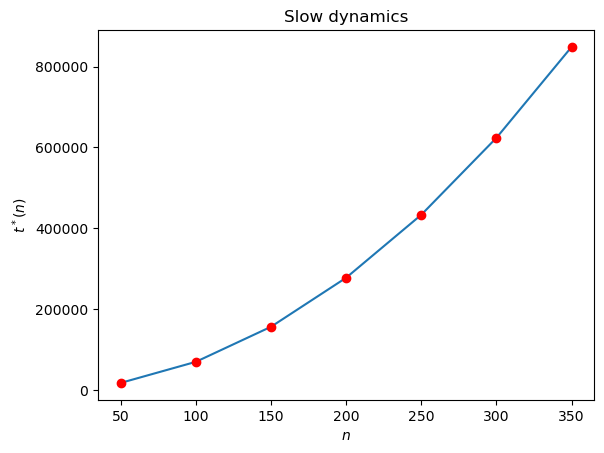

In [3]:
T = 1e6

nn_y = [50; 100; 150; 200; 250; 300; 350]
tt_y = Vector{Int}(undef,length(nn_y))

for n in nn_y
    G = barbell(n)
    y_in = [ones(n); zeros(n)]
    tt_y[searchsortedfirst(nn_y,n)] = french_de_groot_lazy(G.P, y_in, T, target=0.5*ones(2*n))
end

println("n = $nn_y")
println("τ(n) = $tt_y")

close("all")
plot(nn_y,tt_y)
plot(nn_y,tt_y,"or")
xlabel(L"n")
ylabel(L"t^*(n)")
title("Slow dynamics")
gcf()

The interpolating parabola can be calculated. It is $t^*(n) = a n^2 + b n + c$.

In [4]:
using Polynomials

-22.4286 + 6.89738*x + 6.90778*x^2

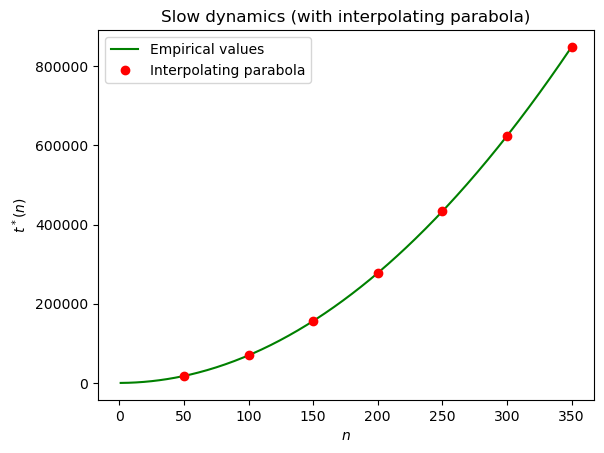

In [9]:
p = Polynomials.fit(Float64.(nn_y),Float64.(tt_y),2)
println(p)

close("all")
xplot = Vector(1:350)
plot(xplot,p.(xplot),color="green")
plot(nn_y,tt_y,"or")
xlabel(L"n")
ylabel(L"t^*(n)")
title("Slow dynamics (with interpolating parabola)")
legend(["Empirical values","Interpolating parabola"])
gcf()